# Определение перспективного тарифа для телеком-компании

## Изучение данных из файлов  и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.1f}'.format)
from scipy import stats as st

In [2]:
call = pd.read_csv('')
call.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.9,1000
3,1000_3,2018-09-21,13.8,1000
4,1000_4,2018-12-15,5.2,1000


In [3]:
print(call.info())
call.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,duration,user_id
count,"202,607.0","202,607.0"
mean,6.8,"1,253.9"
std,5.8,144.7
min,0.0,"1,000.0"
25%,1.3,"1,126.0"
50%,6.0,"1,260.0"
75%,10.7,"1,379.0"
max,38.0,"1,499.0"


В столбце duration (продолжительность звонков) есть нули. Предположительно, это непринятые звонки. Максимальная длинна звонка - 38 мин. 

In [4]:
#в формат даты
call['call_date'] = pd.to_datetime(call['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [5]:
#так как оператор округляет минуты в секунды при каждом звонке, нужно сделать то же
call['duration'] = call['duration'].apply(math.ceil)
call.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [6]:
inter = pd.read_csv('')
inter.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,"1,052.8",2018-09-07,1000
2,2,1000_2,"1,197.3",2018-06-25,1000
3,3,1000_3,550.3,2018-08-22,1000
4,4,1000_4,302.6,2018-09-24,1000


In [7]:
inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
#в формат даты
inter['session_date'] = pd.to_datetime(inter['session_date'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
#перевод мб в гб
inter['gb_used'] = inter['mb_used']/1024

In [10]:
inter.describe()

,Unnamed: 0,mb_used,user_id,gb_used
count,"149,396.0","149,396.0","149,396.0","149,396.0"
mean,"74,697.5",370.2,"1,252.1",0.4
std,"43,127.1",278.3,144.1,0.3
min,0.0,0.0,"1,000.0",0.0
25%,"37,348.8",138.2,"1,130.0",0.1
50%,"74,697.5",348.0,"1,251.0",0.3
75%,"112,046.2",559.6,"1,380.0",0.5
max,"149,395.0","1,724.8","1,499.0",1.7


В данных присутствуют нулевые сесии. Предположительно, это ошибочные сессии. Максимальный расход гб за сессию - 1.7 гб. 

In [11]:
mess = pd.read_csv('')
mess.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
count_mess = mess.groupby(['user_id'])['id'].count()
count_mess.head()

user_id
1000     496
1002      70
1003     380
1004    1192
1005     552
Name: id, dtype: int64

In [14]:
count_mess.describe()

count     426.0
mean      288.8
std       267.6
min         1.0
25%        85.8
50%       215.5
75%       414.0
max     1,463.0
Name: id, dtype: float64

Максимальное количество сообщений в месяц - 1463. Считаю, что такой максимум возможен. 

In [15]:
#в формат даты
mess['message_date'] = pd.to_datetime(mess['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
tariffs = pd.read_csv('')
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [17]:
user = pd.read_csv('')
user.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В столбце "churm date" присутствуют значения NaN. Это означает, что тариф еще действует. Не считаю нужным заменять эти пропуски. 

In [18]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
#в формат даты
user['churn_date'] = pd.to_datetime(user['churn_date'], format='%Y-%m-%dT%H:%M:%S')
user['reg_date'] = pd.to_datetime(user['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
#проверка, что предыдущие этапы подготовки данных прошли успешно 
title = [call, inter, mess, tariffs, user]
for elem in title:
    print(elem.sample())
    elem.info()
    print('Дубликаты', elem.duplicated().sum())
    print()

             id  call_date  duration  user_id
20082  1054_415 2018-03-22         0     1054
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
Дубликаты 0

       Unnamed: 0        id  mb_used session_date  user_id  gb_used
65669       65669  1224_315    158.3   2018-09-07     1224      0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
gb_used         149396 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.8+ 

### Вывод

Проведена предобработка данных: заменены типы данных, округлены значения минут (как это делает оператор), мб переведены в гб (так как оператор производит учет именно в гб), обнаружены и обоснованы нулевые значения. Далее можно приступать к расчетам. 

## Расчёты и добавление результатов в таблицу

Для дальнейших манипуляций необходимо сгруппировать данные по юзеру и месяцу.

In [21]:
#сначала добавлю столбец с месяцем
call['month'] = call['call_date'].dt.month
inter['month'] = inter['session_date'].dt.month
mess['month'] = mess['message_date'].dt.month

In [22]:
#группировка таблицы call и подсчет  количества сделанных звонков и 
#израсходованных минут разговора по месяцам

call_group= call.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()
call_group = call_group.rename(columns={'duration':'min_sum', 'id': 'call_count'})
call_group.head()

,user_id,month,min_sum,call_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [23]:
#группировка таблицы mess и подсчет  количества отправленных смс
mess_group = mess.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
mess_group = mess_group.rename(columns={'id':'mess_count'})
mess_group.head()

,user_id,month,mess_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [24]:
#группировка таблицы inter и подсчет  количества гб
inter_group = inter.groupby(['user_id', 'month']).agg({'gb_used':'sum'}).reset_index()
#теперь округлим гб до ближайшего целого, так как это делает опрератор 
inter_group['gb_used'] = inter_group['gb_used'].apply(math.ceil)
inter_group.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


In [25]:
#необходимо соединить таблицы 'call_group', 'inter_group' и 'mess_group' в одну
one = inter_group.merge(mess_group, on=['user_id', 'month'], how='outer').merge(call_group, on=['user_id', 'month'], how='outer').fillna(0)
display(one)

,user_id,month,gb_used,mess_count,min_sum,call_count
0,1000,5,3.0,22.0,159.0,22.0
1,1000,6,23.0,60.0,172.0,43.0
2,1000,7,14.0,75.0,340.0,47.0
3,1000,8,14.0,81.0,408.0,52.0
4,1000,9,15.0,57.0,466.0,58.0
...,...,...,...,...,...,...
3209,1273,11,0.0,29.0,272.0,45.0
3210,1273,12,0.0,39.0,260.0,41.0
3211,1377,2,0.0,2.0,179.0,23.0
3212,1392,2,0.0,3.0,13.0,2.0


In [26]:
#далее присоединяю таблицы 'user' и 'tariffs'
one = one.merge(user, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', right_on = 'tariff_name', how = 'left')
one.head()
#one.info()

,user_id,month,gb_used,mess_count,min_sum,call_count,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,5,3.0,22.0,159.0,22.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0
1,1000,6,23.0,60.0,172.0,43.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0
2,1000,7,14.0,75.0,340.0,47.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0
3,1000,8,14.0,81.0,408.0,52.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0
4,1000,9,15.0,57.0,466.0,58.0,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0


In [27]:
#функция для рассчета прибыли, полученной с каждого пользователя
def benefit(df):
    if (df['min_sum'] - df['minutes_included']) > 0:
        over_min = (df['min_sum'] - df['minutes_included'])*df['rub_per_minute']
    else:
        over_min = 0
    if (df['mess_count'] - df['messages_included']) > 0:
        over_mess = (df['mess_count'] - df['messages_included'])*df['rub_per_message']
    else:
        over_mess = 0
    if (df['gb_used'] - df['gb_per_month_included']) > 0:
        over_gb = (df['gb_used'] - df['gb_per_month_included'])*df['rub_per_gb']
    else:
        over_gb = 0
    benefit = df['rub_monthly_fee'] + over_min + over_mess +  over_gb    
    return benefit


In [28]:
one['benefit_one'] = one.apply(benefit, axis=1)
one.head()

,user_id,month,gb_used,mess_count,min_sum,call_count,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,benefit_one
0,1000,5,3.0,22.0,159.0,22.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,"1,950.0"
1,1000,6,23.0,60.0,172.0,43.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,"1,950.0"
2,1000,7,14.0,75.0,340.0,47.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,"1,950.0"
3,1000,8,14.0,81.0,408.0,52.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,"1,950.0"
4,1000,9,15.0,57.0,466.0,58.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,"1,950.0"


### Вывод

В таблицу добавлены необходимые для анализа столбцы. Таблицы соеденены в одну, проведен расчет прибыли, полученной с каждого пользователя в месяц. Далее можно приступать к анализу данных. 

## Исследовательский анализ данных

In [29]:
#для дальнейшей обработки разделяю таблицу по тарифам
tariff_smart = one.query('tariff_name != "ultra"')

In [30]:
tariff_ultra = one.query('tariff_name == "ultra"')

In [31]:
#получим данные о средних значения и стандартном отклонении
print('Тариф Смарт')
print(tariff_smart[['gb_used', 'mess_count', 'min_sum', 'benefit_one']].describe().round(1))
print('Тариф Ультра')
print(tariff_ultra[['gb_used', 'mess_count', 'min_sum', 'benefit_one']].describe().round(1))

Тариф Смарт
       gb_used  mess_count  min_sum  benefit_one
count  2,229.0     2,229.0  2,229.0      2,229.0
mean      16.3        33.4    417.9      1,290.0
std        5.7        28.2    190.3        818.4
min        0.0         0.0      0.0        550.0
25%       13.0        10.0    282.0        550.0
50%       17.0        28.0    422.0      1,023.0
75%       20.0        51.0    545.0      1,750.0
max       38.0       143.0  1,435.0      6,770.0
Тариф Ультра
       gb_used  mess_count  min_sum  benefit_one
count    985.0       985.0    985.0        985.0
mean      19.5        49.4    526.6      2,070.2
std        9.9        47.8    317.6        376.2
min        0.0         0.0      0.0      1,950.0
25%       12.0         6.0    284.0      1,950.0
50%       19.0        38.0    518.0      1,950.0
75%       27.0        79.0    752.0      1,950.0
max       49.0       224.0  1,673.0      4,800.0


 Из таблицы видно,  что в среднем пользователям тарифа Смарт требуется 16.3 гб, 33.4 сообщения и 420 минут разговоров в месяц. И тратят они в среднем 1290р в месяц. В тариф включено  15 Гб интернет-трафика, 50 сообщений, 500 минут разговора за плату 550р, а значит, чаще всего люди превышают лимит по интернет трафику. Также стоит обратить внимание, что средние затраты за месяц в 2  раза превышают абонентскую плату. Многим пользователям стоит обратить внимание на тариф с большими лимитами.
 
Пользователи тарифа Ультра используют в среднем в месяц 19.5 гб, 49.4 сообщения и 526 минут разговоров. В тариф включено 30 гб, 1000 сообщения и 3000 минут разговоров, следовательно, в среднем пользователи не превышают тарифные лимиты. Ежемесячная плата за тариф составляет 1950 р, а средние траты клиентов - 2070.2р, разница не значительна.

Пользователи тарифа Смарт более склонны превышать лимиты по тарифу. А пользователи тарифа Ультра в среднем платят больше (2070.2р), чем пользователи Смарта (1290р). 

In [32]:
#расчет дисперсии
print('Тариф Смарт')
print(tariff_smart[['gb_used', 'mess_count', 'min_sum', 'benefit_one']].var().round(1))
print('Тариф Ультра')
tariff_ultra[['gb_used', 'mess_count', 'min_sum', 'benefit_one']].var().round(1)

Тариф Смарт
gb_used            33.0
mess_count        796.8
min_sum        36,219.3
benefit_one   669,785.7
dtype: float64
Тариф Ультра


gb_used            97.1
mess_count      2,285.3
min_sum       100,873.6
benefit_one   141,516.7
dtype: float64

Из величин стандартных отклонений и дисперсий видно, что для обоих тарифов самый большой разброс от среднего у минут разгоровор и выручки с клиента в месяц. Значит их значения будут находиться в самом широком промежутке (по правилу 3-х сигм).

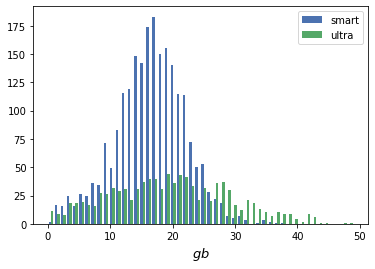

In [33]:
#построение гистограммы по гб
plt.style.use('seaborn-deep')

plt.hist([tariff_smart['gb_used'],tariff_ultra['gb_used']], bins = 50, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.xlabel(r'$gb$', fontsize=13)
plt.show()

Гистограмма тарифа Смарт имеет распределение близкое к нормальному с выраженным пиком наиболее часто встречающихся значений, а гистограмма тарифа Ультра, на мой взгляд, также стремится к нормальному распределению, но не так выраженно. 

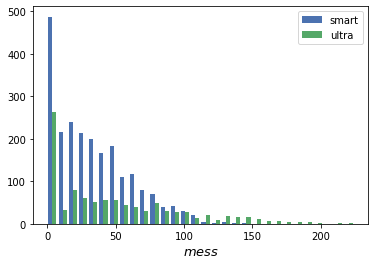

In [34]:
#построение гистограммы по количеству сообщений
plt.style.use('seaborn-deep')

plt.hist([tariff_smart['mess_count'],tariff_ultra['mess_count']], bins = 30, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.xlabel(r'$mess$', fontsize=13)
plt.show()

Гистограммы по количеству сообщений напоминают распределение Пуассона, однако, на обеих гистограммах есть высокие пики около нуля - это является отклонением. На практике это связано с тем, что большое количество людей практически не используют смс сообщения.

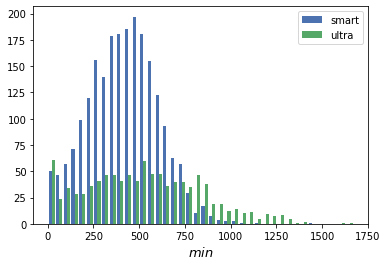

In [35]:
#построение гистограммы по количеству минут разговоров
plt.style.use('seaborn-deep')

plt.hist([tariff_smart['min_sum'],tariff_ultra['min_sum']], bins = 40, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.xlabel(r'$min$', fontsize=13)
plt.show()

Гистограмма по количеству использованных минут тарифа Смарт имеет распределения близкое к нормальному, но со скошенностью вправо. Для тарифа Ультра гистограмма также имеет скошенность вправо и высокие пики около нулевых значений, что не соответствует нормальному распределению.

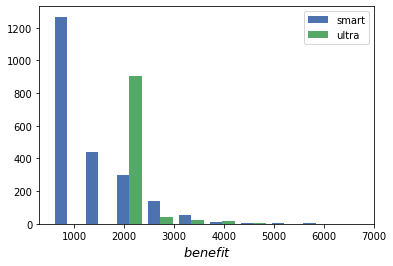

In [36]:
#построение гистограммы по прибыли
plt.style.use('seaborn-deep')

plt.hist([tariff_smart['benefit_one'],tariff_ultra['benefit_one']], bins = 10, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.xlabel(r'$benefit$', fontsize=13)
plt.show()

Из гистограмм видно, что больше всего платят пользователи тарифа Ультра.

### Вывод

Проведен исследовательский анализ данных. Описано поведение клиентов оператора, исходя из выборки.

В среднем пользователям тарифа Смарт требуется 16.3 гб, 33.4 сообщения и 420 минут разговоров в месяц. И тратят они в среднем 1290р в месяц. Пользователи тарифа Ультра используют в среднем в месяц 19.5 гб, 49.4 сообщения и 526 минут разговоров. 

Пользователи тарифа Смарт более склонны превышать лимиты по тарифу. А пользователи тарифа Ультра в среднем платят больше (2070.2р), чем пользователи Смарта (1290р). 

Посчитаны дисперсия и стандартное отклонение, построены гистограммы.

## Проверка гипотез

Гипотезы:
    
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сначала создам выборки по городам.

In [38]:
#таблица по Москве
from_msk = one.query('city == "Москва"')
from_msk['benefit_one'].var().round(1)

565636.5

In [39]:
#таблица по регионам
from_regions = one.query('city != "Москва"')
from_regions['benefit_one'].var().round(1)

654137.6

Выше я проверила дисперсии выборок, чтобы определиться с параметром equal_var. Считаю, что дисперсии выборок можно приближенно считать равными.

Проверим 1 гипотезу:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
Для этого необходимо сформулировать нулевую гипотезу. Нулевая гипотеза всегда формируется исходя из равенства чего-либо к чему-либо.

H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, между ними нет разницы.

Н1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, между ними есть разница.

Для своих тестов я выбрала критический уровень - статистической значимости 0.05, следоватльно, уровень ошибки 5%. Считаю этот процент ошибки приемлемым в данном случае. 

In [42]:
alpha = .05
results = st.ttest_ind(tariff_smart['benefit_one'], tariff_ultra['benefit_one'], equal_var = False)
#В тест добавила параметр equal_var = False, так как дисперсии у генеральных совокупностей 
#не равны (см. ячейку 29 в шаге 3) и выборки разного размера.
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


В результате теста нулевая гипотеза была отвергнута. Следовательно, есть основания предполагать, что  средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, между ними есть разница.

Ранее выявлено, что пользователи тарифа Ультра в среднем платят больше (2070.2р), чем пользователи Смарта (1290р). Возможны 2 варианта - разница действительно есть или же наблюдаемая разница - случайность.
Но так как был проведен двухсторонний тест и гипотеза H0 о равенстве средних была отвергнута,  то есть основания предполагать, что наблюдаемая разница действительно существует. Теперь можно сделать вывод, что тариф Ультра является более выгодным для оператора. 

Проверим 2 гипотезу:
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Для этого необходимо сформулировать нулевую гипотезу.

H0: Средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны, между ними нет разницы.

Н1: Средняя выручка пользователей из Москвы и выручка пользователей из других регионов не равны, между ними есть разница.


In [43]:
alpha = .05
results = st.ttest_ind(from_msk['benefit_one'], from_regions['benefit_one'])
#не стала добавлять параметр  equal_var, так как считаю дисперсии выборок равными
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


В результате теста нулевая гипотеза не была отвергнута. Следовательно, есть основания предполагать, что cредняя выручка пользователей из Москвы и выручка пользователей из других регионов не отличается.

## Общий вывод

В ходе анализа проведена предобработка данных: заменены типы данных, округлены значения минут (как это делает оператор), мб переведены в гб (так как оператор производит учет именно в гб), обнаружены и объяснены нулевые значения.

В таблицу добавлены необходимые для анализа столбцы, таблицы соеденены в одну, проведен рассчет прибыли, полученной с каждого пользователя в месяц. 

Проведен иссследовательский анализ данных. Описно поведение клиентов оператора, исходя из выборки.

В среднем пользователям тарифа Смарт требуется 16.3 гб, 33.4 сообщения и 420 минут разговоров в месяц. И тратят они в среднем 1290р в месяц. В тариф включено  15 Гб интернет-трафика, 50 сообщений, 500 минут разговора за плату 550р, а значит, чаще всего люди превышают лимит по интеренет трафику. Также стоит обратить внимание, что средние затраты за месяц в 2  раза превышают абонентскую плату. Многим позьзователям стои обратить внимаание на тариф с большими лимитами.
 
Пользователи тарифа Ультра используют в среднем в месяц 19.5 гб, 49.4 сообщения и 526 минут разговоров. В тариф включено 30 гб, 1000 сообщения и 3000 минут разговоров, следовательно, в среднем пользователи не превышают тарифные лимиты. Ежемесячная плата за тариф составляет 1950 р, а средние траты клиентов - 2070.2р, разница не значительна.

Пользователи тарифа Смарт более склонны превышать лимиты по тарифу. А пользователи тарифа Ультра в среднем платят больше (2070.2р), чем пользователи Смарта (1290р). 

Проверены 2 гипотезы.

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В результате теста нулевая гипотеза не была отвергнута. Следовательно, есть основания предполагать, что cредняя выручка пользователей из Москвы и выручка пользователей из других регионов не отличается.

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Было выявлено, что пользователи тарифа Ультра в среднем платят больше (2070.2р), чем пользователи Смарта (1290р). Возможны 2 варианта - разница действительно есть или же наблюдаемая разница - случайность.

Но так как был проведен двухсторонний тест и гипотеза H0 о равенстве средних была отвергнута, то есть основания предполагать, что  средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, между ними есть разница.

Теперь можно сделать вывод, что тариф Ультра является более выгодным и перспективным для опрератора. 
